## High Frequency Data Analysis Exercise
##### szli@github, szli.code@gmail.com

This exercise analyze high frequency quote and trade data of four stocks. More specifically
* Data cleanup and time stamp conversion
* Autocorrelation of the tick-by-tick mid price return and trade price return
* Correlation matrix of one minute return of the four stocks

In [2]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import numba

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
print(sys.version)
print(pd.version.version)
print(np.version.version)

3.4.3 |Anaconda 2.3.0 (64-bit)| (default, Mar  6 2015, 12:06:10) [MSC v.1600 64 bit (AMD64)]
0.16.2
1.9.2


### 1. Data clean up

In [4]:
rawcsv = pd.read_csv('./sample.taq.csv', header = None,  names = ['time', 'sym', 'type','d1','d2','d3','d4'],
                     nrows = 3139595, error_bad_lines=True, dtype={'d1': np.float64, 'd2': np.float64, 'd3':np.float64, 'd4':np.float64})

In [5]:
rawcsv

,time,sym,type,d1,d2,d3,d4
0,40003.448829,SLB,Q,101.00,128.37,200,100
1,40003.448927,SLB,Q,110.96,128.37,100,100
2,40014.967413,SLB,Q,110.95,128.37,100,100
3,40014.974791,SLB,Q,110.96,128.37,100,100
4,40014.986969,SLB,Q,110.95,128.37,100,100
5,40014.995795,SLB,Q,110.96,128.37,100,100
6,40014.996803,SLB,Q,110.95,128.37,100,100
7,40015.546104,SLB,Q,101.00,128.37,200,100
8,40015.546228,SLB,Q,110.96,128.37,100,100
9,40015.549694,SLB,Q,101.00,128.37,200,100


In [6]:
pd.isnull(rawcsv).any(0)

time    False
sym     False
type    False
d1      False
d2      False
d3      False
d4      False
dtype: bool

No NaN in raw csv

In [7]:
rawcsv['sym'].unique()

array(['SLB', 'JPM', 'NOV', 'WFC'], dtype=object)

starting from 3139596, four lines are exotic data, from 16:00:00 due to end of trading day, just ignore the remaining since we only care about 9:30 to 16:00

Caveat: Somehow the pandas CSV parser treats d1-d4 as string after a certain row, need to specify dtype to force casting. We need d2 to be floating point type because it could be ask price or trade size.

In [8]:
rawcsv

,time,sym,type,d1,d2,d3,d4
0,40003.448829,SLB,Q,101.00,128.37,200,100
1,40003.448927,SLB,Q,110.96,128.37,100,100
2,40014.967413,SLB,Q,110.95,128.37,100,100
3,40014.974791,SLB,Q,110.96,128.37,100,100
4,40014.986969,SLB,Q,110.95,128.37,100,100
5,40014.995795,SLB,Q,110.96,128.37,100,100
6,40014.996803,SLB,Q,110.95,128.37,100,100
7,40015.546104,SLB,Q,101.00,128.37,200,100
8,40015.546228,SLB,Q,110.96,128.37,100,100
9,40015.549694,SLB,Q,101.00,128.37,200,100


In [9]:
syms = rawcsv['sym'].unique() # ['SLB', 'JPM', 'NOV', 'WFC']

In [10]:
quotes = {sym: pd.DataFrame for sym in syms}
trades = {sym: pd.DataFrame for sym in syms}

In [11]:
grouped = rawcsv.groupby(['sym','type'])

In [12]:
grouped.first() #This removes sym and type column in grouped.get_group

time      d1       d2   d3    d4
sym type                                          
JPM Q     40114.333994   57.88    58.70  500   200
    T     43846.022625   58.70   200.00    5     0
NOV Q     40224.983465   78.82    87.00  100   200
    T     80001.738312   83.00   100.00   40     0
SLB Q     40003.448829  101.00   128.37  200   100
    T     85852.264515  111.12    48.00    5     0
WFC Q     40426.256739   50.96    53.20  300  5000
    T     72927.557545   51.62  1000.00    1     0

In [13]:
for sym in syms:
    q = grouped.get_group((sym, 'Q')) 
    #only take between 9:30 and 16:00
    quotes[sym] = q[(q.time >= 93000) & (q.time <= 160000)] #.drop(['sym', 'type'], axis = 1)
    t = grouped.get_group((sym, 'T'))
    trades[sym] = t[(t.time >= 93000) & (t.time <= 160000)] #.drop(['sym', 'type'], axis = 1)
#quotes and trades contains raw price, size data for each symbol

In [14]:
quotes['NOV']

,d1,d2,d3,d4,time
1837,82.45,83.29,300,300,93000.089285
1838,82.46,83.29,300,300,93000.089287
1839,82.46,83.29,300,400,93000.090329
1840,82.46,83.29,400,400,93000.090331
1855,82.46,83.29,700,400,93000.188251
1856,82.46,83.29,700,700,93000.195435
1857,82.47,83.29,300,700,93000.201859
1858,82.47,83.29,400,700,93000.203892
1860,82.47,83.29,400,600,93000.218947
1899,82.47,83.27,400,300,93000.573910


In [15]:
#Find the crossed quotes and remove them, print out the row number and time stamp of the crossed quote
for sym in syms:
    print(sym)
    print("Before dropping:", quotes[sym].shape)
    crossed_idx = quotes[sym].index[(quotes[sym].d1 > quotes[sym].d2).nonzero()[0]]
    print("Number of crossed quotes:", len(crossed_idx))
    print(quotes[sym].loc[crossed_idx])    
    quotes[sym] = quotes[sym].drop(crossed_idx)
    print("After dropping:", quotes[sym].shape)

SLB
Before dropping: (236957, 5)
Number of crossed quotes: 350
             d1      d2   d3   d4           time
303767   111.04  111.02  100  200  100425.530288
353529   111.07  111.06  200  100  100822.557583
353530   111.07  111.06  300  100  100822.557590
353546   111.07  111.06  400  100  100822.558821
353549   111.07  111.06  500  100  100822.559653
353551   111.07  111.06  400  100  100822.560250
353553   111.07  111.06  300  100  100822.561251
353555   111.07  111.06  400  100  100822.562725
353556   111.07  111.06  500  100  100822.562729
353557   111.07  111.06  400  100  100822.563297
353558   111.07  111.06  300  100  100822.563375
360254   111.13  111.12  100  600  100901.700467
360255   111.13  111.12  100  500  100901.700472
360256   111.13  111.12  200  500  100901.700483
360262   111.13  111.12  200  200  100901.701793
360264   111.13  111.12  200  100  100901.702337
365014   111.24  111.23  100  100  100929.269700
365015   111.24  111.23  300  100  100929.269720
365016

In [16]:
for sym in syms:
    print(sym)   
    crossed_idx = quotes[sym].index[(quotes[sym].d1 > quotes[sym].d2).nonzero()[0]]
    print(len(crossed_idx))

SLB
0
JPM
0
NOV
0
WFC
0


In [17]:
#Take a look at five sigma outliers, note the index printed is the index (not label) in each individual data frame
for sym in syms:
    print(sym)
    print((np.abs(quotes[sym].d1 - quotes[sym].d1.mean() ) > 5 * quotes[sym].d1.std()).nonzero())
    print((np.abs(quotes[sym].d2 - quotes[sym].d2.mean() ) > 5 * quotes[sym].d2.std()).nonzero())
    print((np.abs(trades[sym].d1 - trades[sym].d1.mean() ) > 5 * trades[sym].d1.std()).nonzero())

SLB
(array([], dtype=int64),)
(array([68869], dtype=int64),)
(array([], dtype=int64),)
JPM
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([64699], dtype=int64),)
NOV
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
WFC
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([26174], dtype=int64),)


In [19]:
trades['WFC'].iloc[26173:26176] #focus on 26174

,d1,d2,d3,d4,time
1470587,51.83,500,1,1,123500.031383
1470588,9.83,500,1,1,123500.031384
1470724,51.83,100,61,0,123501.627271


In [20]:
trades['WFC'] = trades['WFC'].drop(trades['WFC'].index[26174])

In [21]:
quotes['SLB'].iloc[68868:68871] #focus on 68869

,d1,d2,d3,d4,time
983105,110.60,110.62,400,100,112331.981147
983106,110.60,210.62,100,100,112331.981148
983111,110.61,110.62,100,100,112332.179731


In [22]:
quotes['SLB'] = quotes['SLB'].drop(quotes['SLB'].index[68869])

In [23]:
trades['JPM'].iloc[64698:64701] #focus on 64699

,d1,d2,d3,d4,time
3107167,58.92,21,61,0,155800.010907
3107168,78.92,1200,1,0,155800.010908
3107471,58.92,100,11,0,155800.611183


In [24]:
trades['JPM'] = trades['JPM'].drop(trades['JPM'].index[64699])

I also looked at 3-sigma outliers, but they are actually reasonable intraday moves. So we accept them.

### 2. Time Stamp Conversion

I come up with an efficient way in Python using numba just-in-time compiler to convert customized timestamp to Pandas timestamp. It is able to convert 3 millions timestamp in abour 350 ms. 

In [26]:
#Returns epoch time in us. The numba JIT compiler generates machine code, making it much faster than python
@numba.vectorize(['uint64(float64)'], target='cpu')
def toEpochUFunc(ts):
    ts = ts * 1000000 
    h = ts // 10000000000
    ts = ts % 10000000000
    m = ts // 100000000
    ts = ts % 100000000
    s = ts // 1000000
    us = ts % 1000000
    #assumes the date is Aug 21, 2015, since we do not know the date. Does not matter.
    return (1440115200 + h * 3600 + m * 60 + s) * 1000000 + us

In [27]:
#How fast to convert all 3 millions timestamps to pandas DateTimeIndex
%time  epons = toEpochUFunc(rawcsv.time.values) * 1000 #350 ms to convert to epoch ns
%time  pd.to_datetime(epons.astype('datetime64[ns]')) #10ms to create pandas DateTimeIndex

Wall time: 341 ms
Wall time: 11 ms


DatetimeIndex(['2015-08-21 04:00:03.448829', '2015-08-21 04:00:03.448927',
               '2015-08-21 04:00:14.967413', '2015-08-21 04:00:14.974791',
               '2015-08-21 04:00:14.986969', '2015-08-21 04:00:14.995795',
               '2015-08-21 04:00:14.996803', '2015-08-21 04:00:15.546104',
               '2015-08-21 04:00:15.546228', '2015-08-21 04:00:15.549694', 
               ...
               '2015-08-21 15:59:59.908438', '2015-08-21 15:59:59.908962',
               '2015-08-21 15:59:59.910291', '2015-08-21 15:59:59.915648',
               '2015-08-21 15:59:59.923683', '2015-08-21 15:59:59.928341',
               '2015-08-21 15:59:59.966927', '2015-08-21 15:59:59.994780',
               '2015-08-21 15:59:59.995358', '2015-08-21 15:59:59.995646'],
              dtype='datetime64[ns]', length=3139595, freq=None, tz=None)

### 3. Autocorrelation of quotes and trades

In [28]:
#Note that we need return and price (for minutes price data)
quoteRet = {}
quotePrice = {}
for sym in syms:
    quotePrice[sym] = pd.DataFrame(index = pd.to_datetime(toEpochUFunc(quotes[sym].time.values) * 1000), 
                      data=(quotes[sym].d1.values + quotes[sym].d2.values)/2, columns=['Mid'])
    quoteRet[sym] = quotePrice[sym].pct_change().dropna()

In [29]:
quotePrice['JPM'] #Just to give an example

,Mid
2015-08-21 09:30:00.061424,59.025
2015-08-21 09:30:00.061426,59.025
2015-08-21 09:30:00.062633,59.015
2015-08-21 09:30:00.062657,59.010
2015-08-21 09:30:00.067675,59.010
2015-08-21 09:30:00.067682,59.010
2015-08-21 09:30:00.070331,59.010
2015-08-21 09:30:00.071750,59.010
2015-08-21 09:30:00.084090,59.035
2015-08-21 09:30:00.087116,59.040


In [30]:
tradeRet = {}
for sym in syms:
    tradeRet[sym] = pd.DataFrame(index = pd.to_datetime(toEpochUFunc(trades[sym].time.values) * 1000), 
                                data=trades[sym].d1.values, columns=['Trd']).pct_change().dropna()
    

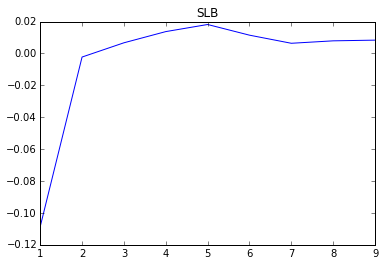

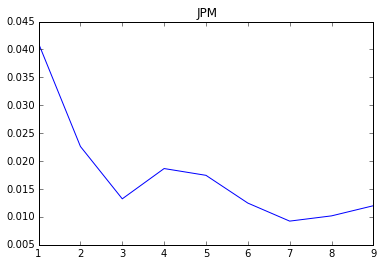

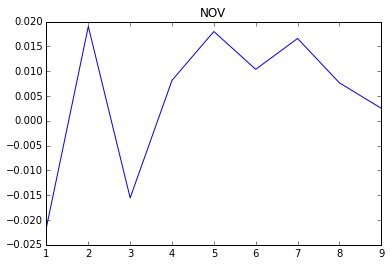

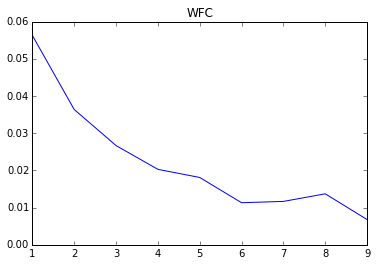

In [31]:
#Autocorrelation of mid quote returns
lags = range(1,10)
for sym in syms:    
    ac = list(map(lambda lag: quoteRet[sym].Mid.autocorr(lag), lags))
    plt.figure()
    plt.plot(lags,ac)
    plt.title(sym)
    
             

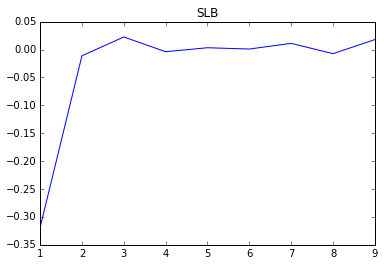

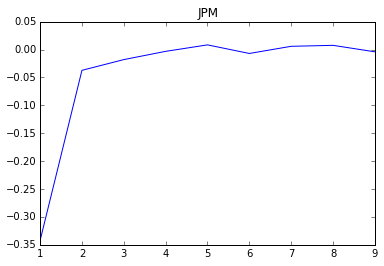

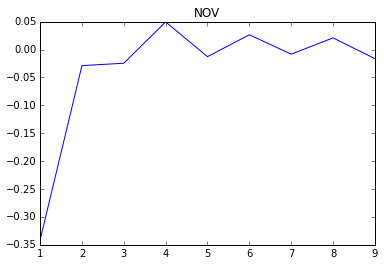

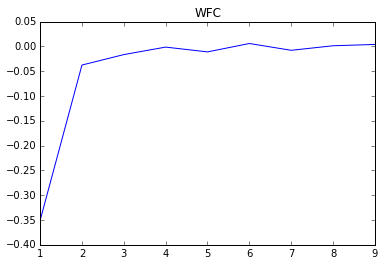

In [32]:
#Autocorrelation of trade returns
for sym in syms:
    ac = list(map(lambda lag: tradeRet[sym].Trd.autocorr(lag), lags))
    plt.figure()
    plt.plot(lags,ac)
    plt.title(sym)

Trade return has stronger negative autocorrelation than mid quote returns. I suspect this is because trades happan between bid and ask prices, bouncing between bid and ask prices.

Quote return autocorrelation is a bit hard to explain to me... And I even suspect if it makes sense to compute quote by quote mid quote return autocorrelation, because lots of time the quote price does not change and return is just zero... 

### 4. Minutes return and correlation matrix

In [33]:
#Here I sample mid quote to minutes. Note that we need to consider case when there is no data in that minute, here I just do simple things: just fill use previous minute price
min_ret = {}
for sym in syms:
    #This gives a Series, rather than a DF. dropna() is to drop the first time stamp NaN.
    min_ret[sym] = quotePrice[sym].resample('1min', how='median').fillna(method='ffill').pct_change().dropna()['Mid']    


In [34]:
min_retDF = pd.DataFrame(data=min_ret)

In [35]:
min_retDF

,JPM,NOV,SLB,WFC
2015-08-21 09:31:00,0.001947,-0.001085,0.001568,0.003191
2015-08-21 09:32:00,0.000084,0.002111,0.000268,0.000867
2015-08-21 09:33:00,0.000169,0.003371,-0.000134,0.001541
2015-08-21 09:34:00,0.000676,0.000360,-0.000671,0.000288
2015-08-21 09:35:00,-0.000169,0.000660,-0.000045,0.000096
2015-08-21 09:36:00,-0.000338,-0.000240,0.000000,0.000000
2015-08-21 09:37:00,0.000000,-0.000839,0.000582,0.000384
2015-08-21 09:38:00,0.000169,-0.000660,-0.000626,0.000961
2015-08-21 09:39:00,0.000507,-0.001921,-0.001521,0.000384
2015-08-21 09:40:00,-0.000169,-0.001203,-0.001703,-0.000576


In [36]:
#Correlation matrix of minute returns
min_corr = min_retDF.corr()
min_corr

,JPM,NOV,SLB,WFC
JPM,1.000000,0.418408,0.545826,0.750968
NOV,0.418408,1.000000,0.547980,0.398392
SLB,0.545826,0.547980,1.000000,0.502081
WFC,0.750968,0.398392,0.502081,1.000000


JPM and WFC both in finance industry, exhibits high correlation as expected. 
NOV and SLV both in oil/NG industry, but the correlation is not as high as JPM and WFC.